In [179]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline 

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
tweets = pd.read_csv("/content/Airline-Sentiment-2-w-AA.csv")

In [182]:
tweets.head()


,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,...,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,...,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,...,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,...,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,...,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,...,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


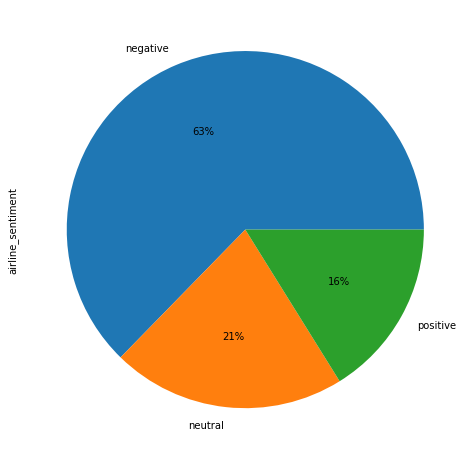

In [183]:
plt.rcParams["figure.figsize"] = [8,10]
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

As seen above, most of the sentiment is negative which totals to 63%, so we shouldn't be surprised to see a lot of negative words when creating a wordcloud.  21% of the sentiment was neutral and 16% positive. 

In [184]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [185]:
tweets['airline_sentiment'].replace(['negative', 'neutral', 'positive'],
                                   [0,1,2], inplace=True)

In [186]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweets['text_without_sw'] = tweets.text.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [187]:
tweets.head()

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,...,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,text_without_sw
0,0,681448150,False,finalized,3,2/25/15 5:24,1,1.0000,NaN,NaN,...,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada),@VirginAmerica What @dhepburn said.
1,1,681448153,False,finalized,3,2/25/15 1:53,2,0.3486,NaN,0.0000,...,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada),@VirginAmerica plus added commercials experien...
2,2,681448156,False,finalized,3,2/25/15 10:01,1,0.6837,NaN,NaN,...,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada),@VirginAmerica I today... Must mean I need tak...
3,3,681448158,False,finalized,3,2/25/15 3:05,0,1.0000,Bad Flight,0.7033,...,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada),@VirginAmerica really aggressive blast obnoxio...
4,4,681448159,False,finalized,3,2/25/15 5:50,0,1.0000,Can't Tell,1.0000,...,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada),@VirginAmerica really big bad thing


In [188]:
tweets.describe()

,index,_unit_id,_trusted_judgments,airline_sentiment,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,14640.000000,1.464000e+04,14640.000000,14640.000000,14640.000000,10522.000000,14640.000000,1.464000e+04
mean,7319.500000,6.814957e+08,3.618648,0.534495,0.900169,0.638298,0.082650,5.692184e+17
std,4226.348306,8.504314e+04,11.858704,0.756084,0.162830,0.330440,0.745778,7.791092e+14
min,0.000000,6.814482e+08,2.000000,0.000000,0.335000,0.000000,0.000000,5.675880e+17
25%,3659.750000,6.814536e+08,3.000000,0.000000,0.692300,0.360600,0.000000,5.685590e+17
50%,7319.500000,6.814578e+08,3.000000,0.000000,1.000000,0.670600,0.000000,5.694780e+17
75%,10979.250000,6.814623e+08,3.000000,1.000000,1.000000,1.000000,0.000000,5.698902e+17
max,14639.000000,6.816798e+08,248.000000,2.000000,1.000000,1.000000,44.000000,5.703110e+17


In [189]:
tweets.isnull().sum()

index                               0
_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
text_without_sw                     0
dtype: int64

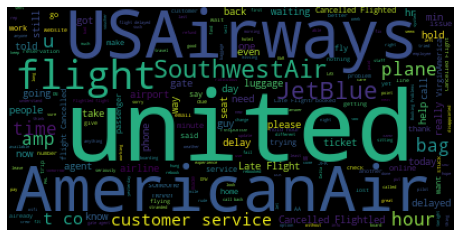

In [190]:
#NEGATIVE TWEETS WORDCLOUD
tweets_df = tweets[tweets["airline_sentiment"] == 0]

plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(tweets_df['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

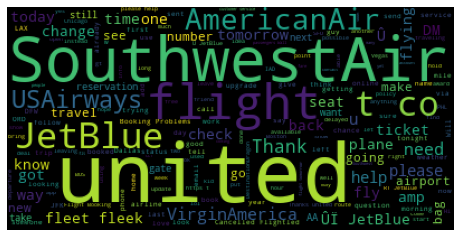

In [191]:
#NEUTRAL TWEETS WORDCLOUD

tweets_neutral = tweets[tweets["airline_sentiment"] == 1]

plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(tweets_neutral['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

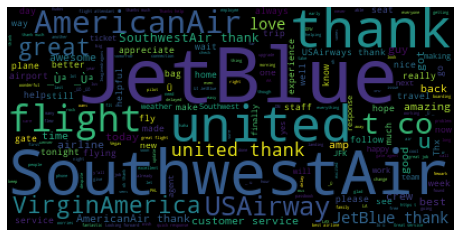

In [192]:
#POSITIVE TWEETS
tweets_positive = tweets[tweets["airline_sentiment"] == 2]

plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(tweets_positive['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [193]:
X = tweets['text']
y = tweets['airline_sentiment']

def clean_text(doc):

  document = re.sub('[^a-zA-Z]', ' ',doc)
  document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
  document = re.sub(r'\s+', ' ', document)

  return document

In [194]:
X_sentences = []
reviews = list(X)
for rev in reviews:
  X_sentences.append(clean_text(rev))

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer #converts the text to numerical form 
     

vectorizer = TfidfVectorizer(max_features=2250, min_df=6,
                             max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(X_sentences).toarray()

In [196]:
from sklearn.model_selection import train_test_split #dividing data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [197]:
from sklearn.naive_bayes import MultinomialNB #this trains the model

spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

MultinomialNB()

In [198]:
y_pred = spam_detector.predict(X_test) #making predictions on model

In [199]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred) #confusion matrix 

array([[1775,   37,   14],
       [ 399,  188,   24],
       [ 231,   42,  218]])

In [200]:
print(classification_report,(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

<function classification_report at 0x7f3b0ab66040> (8515     2
3439     0
6439     2
5112     0
5645     2
        ..
11412    0
10581    0
1986     0
3267     0
5670     2
Name: airline_sentiment, Length: 2928, dtype: int64, array([2, 0, 2, ..., 0, 0, 0]))
0.7448770491803278


In [201]:
print(X_sentences[45])#randomly selected one of the texts and model indentified as not spam
print(y[45])

 VirginAmerica m elevategold for good reason you rock 
2




*   The model scored an accuracy of 74.8% 
*   Based off the confusion matrix the model predicted 1774 negative tweets, 184 neutral tweets, and 218 positive tweets correctly. 





